In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def print_graph(values, thresholds):
    plt.figure()
    plt.xlim(0, len(values))
    plt.ylim(0, 1)
    plt.plot(values)
    plt.plot(thresholds)
    plt.show()

#0 command


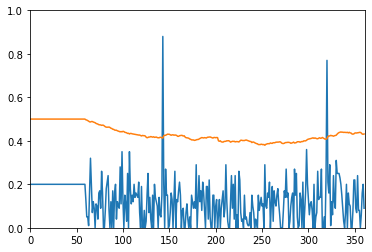


#1 command


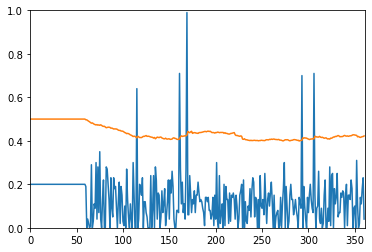


#2 command


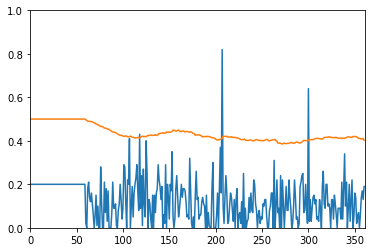


#3 command


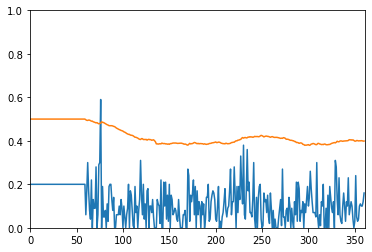

In [33]:
multiple = 1.6449 # 10% 기준 확률 모델링
length = 60

upper_bound = 0.8
lower_bound = 0.2
default_threshold = 0.5
min_gap_threshold = 0.3

arr_of_data1 = [ lower_bound for _ in range(length) ]
arr_of_data2 = [ lower_bound for _ in range(length) ]
arr_of_data3 = [ lower_bound for _ in range(length) ]
arr_of_data4 = [ lower_bound for _ in range(length) ]

with open("data.csv", "r") as f:
    for idx, line in enumerate(f.readlines()):
        if idx > length * 5: # for test
            break
            
        line.replace("\n", "")
        if line == "":
            continue
        data1, data2, data3, data4 = line.split(',')
        
        arr_of_data1.append(float(data1))
        arr_of_data2.append(float(data2))
        arr_of_data3.append(float(data3))
        arr_of_data4.append(float(data4))

arr_of_scores = [ arr_of_data1, arr_of_data2, arr_of_data3, arr_of_data4 ]
arr_of_thresholds = []

for idx, scores in enumerate(arr_of_scores):
    scores = np.array(scores)
    
    thresholds = [ default_threshold for _ in range(length) ]
    thresholds += list(np.array([ sum(scores[i-length+1:i]) / length for i in range(length, len(scores)) ]) \
                + np.array([ max(min_gap_threshold, multiple * np.std(scores[i-length+1:i])) for i in range(length, len(scores))]))

    arr_of_thresholds.append(thresholds)
    
    print("#" + str(idx) + " command")
    print_graph(scores, thresholds)
    print()
    